<a href="https://colab.research.google.com/github/amiralitalebi/CN6005_2321004/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/UEL_Ai/Country-data.csv')
df.head()


Mounted at /content/drive


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
xx = df[['health', 'income']]
xx.head()


,health,income
0,7.58,1610
1,6.55,9930
2,4.17,12900
3,2.85,5900
4,6.03,19100


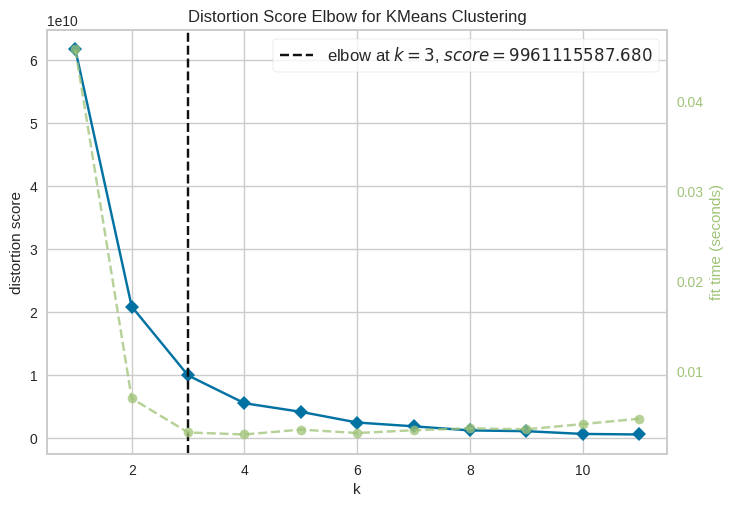

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(xx)
visualizer.show()


In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(xx)

df['Cluster'] = kmeans.labels_
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [7]:
from collections import Counter
Counter(kmeans.labels_)


Counter({np.int32(1): 127, np.int32(2): 35, np.int32(0): 5})

In [8]:
sil = silhouette_score(xx, kmeans.labels_)
print("Silhouette Score:", sil)


Silhouette Score: 0.696607038870568


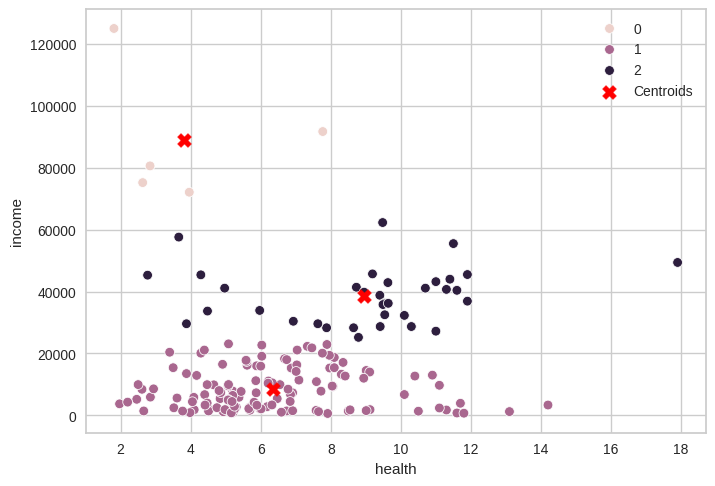

In [9]:
sns.scatterplot(data=xx, x='health', y='income', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red', marker='X', s=100, label='Centroids')
plt.legend()
plt.show()


In [10]:
newdata = pd.DataFrame([[85.89,30400],[10,10000],[15,1700],[3,6000]],
                       columns=['health','income'])
pred = kmeans.predict(newdata)

print(newdata)
print(pred)


   health  income
0   85.89   30400
1   10.00   10000
2   15.00    1700
3    3.00    6000
[2 1 1 1]


This week I learned how to use K-Means clustering to group countries based on health spending and income. At first, I found the idea of clustering confusing because there is no label to guide the model. But when I plotted the clusters, it became clearer how the algorithm separates the countries into groups with similar patterns. The Elbow method helped me choose the number of clusters, and the silhouette score confirmed that three clusters gave a good fit.

I also learned how to use the KMeans model to predict the cluster for new data points, which helped me understand how clustering can be used in real situations. Overall, this week made me more confident using unsupervised learning, and I now understand how data can naturally form groups even without labels.